In [17]:
import numpy as np

What is Normalization ?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [19]:
# Min-Max scaling
x = [1,3,7,6,5,2,3]
#minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]
#print("min_max_using_python :",minmax)


# Min-Max scaling using numpy
import numpy as np
x_np = np.array(x)
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
print("min_max_using_numpy :",np_minmax)


min_max_using_numpy : [0.         0.33333333 1.         0.83333333 0.66666667 0.16666667
 0.33333333]


What is Standardization ?
It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

Formula for Standardization:



In [20]:
x = [1,3,7,6,5,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]
print("z_scores uisng python :",z_scores)


# Standardization using numpy
import numpy as np
x_np = np.array(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()
print("z_scores using numpy :",z_scores_np)

z_scores uisng python : [-1.4071950894605836, -0.4221585268381751, 1.5479145984066418, 1.0553963170954377, 0.5628780357842333, -0.9146768081493794, -0.4221585268381751]
z_scores using numpy : [-1.40719509 -0.42215853  1.5479146   1.05539632  0.56287804 -0.91467681
 -0.42215853]


In [21]:
#standard deviation
round(z_scores_np.std(),2)

1.0

In [22]:
#mean score
round(z_scores_np.mean(),2)

-0.0

# Hands on feature scaling 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [24]:
# load the other dataset
df_country = pd.read_excel("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Scaling.xlsx")
df_country   

,Experience,Salary,Country_Type
0,1,30,Devloping
1,3,35,Developed
2,4,43,Devloping
3,5,36,Developed
4,6,27,Devloping
5,4,32,Developed
6,5,18,Developed
7,3,10,Developed
8,2,12,Devloping
9,5,11,Devloping


In [27]:
X = df_country.drop("Country_Type",axis=1)
y = df_country["Country_Type"]

In [28]:
type(X)
type(y)

pandas.core.series.Series

In [31]:
y.shape

(15,)

In [30]:
y.shape

(15,)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
# First we will devide the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 2)
(10,)
(5, 2)
(5,)


In [36]:
df_exp = X_train

In [37]:
df_exp

,Experience,Salary
8,2,12
2,4,43
1,3,35
14,1,8
4,6,27
7,3,10
10,4,37
12,3,14
3,5,36
6,5,18


In [38]:
X_test

,Experience,Salary
9,5,11
11,5,21
0,1,30
13,2,16
5,4,32


# Min-Max Scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Create the object
minmax_scale = MinMaxScaler()
# fit on the train dataset
minmax_scale.fit((df_exp))
# transform the train dataset columns ("Experience" and "Salary")
df_exp_minmax = minmax_scale.transform(df_exp)
print(type(df_exp_minmax))
df_exp_minmax_new = pd.DataFrame(df_exp_minmax,columns=["Experience","Salary"])
df_exp_minmax_new

<class 'numpy.ndarray'>


,Experience,Salary
0,0.2,0.114286
1,0.6,1.000000
2,0.4,0.771429
3,0.0,0.000000
4,1.0,0.542857
5,0.4,0.057143
6,0.6,0.828571
7,0.4,0.171429
8,0.8,0.800000
9,0.8,0.285714


In [45]:
# To avoid the data leakage we fisrt split the dataset then wecreate object and fit of train dataset
# and use that fit to transform the test dataset
# transform the test dataset using train dataset fit ("Experience" and "Salary")
X_test_minmax = minmax_scale.transform(X_test)
print(type(X_test_minmax))
df_test_minmax_new = pd.DataFrame(X_test_minmax,columns=["Experience","Salary"])
df_test_minmax_new

<class 'numpy.ndarray'>


,Experience,Salary
0,0.8,0.085714
1,0.8,0.371429
2,0.0,0.628571
3,0.2,0.228571
4,0.6,0.685714


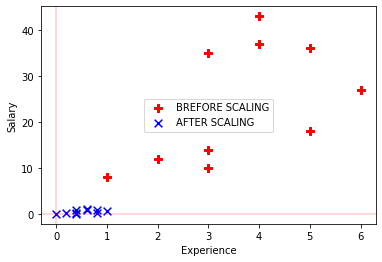

In [46]:
ax = df_exp.plot.scatter(x="Experience", y="Salary",marker = "P",s=80, label='BREFORE SCALING',color='red')
df_exp_minmax_new.plot.scatter(x="Experience", y="Salary",marker = "x",s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

# Standard Scaler

In [47]:

from sklearn.preprocessing import StandardScaler

In [48]:
# create the object
std_scale = StandardScaler()
# fit and transform the columns ("Experience" and "Salary")
df_exp_std = std_scale.fit_transform(df_exp.iloc[:,0:2])
print(type(df_exp_std))
df_exp_std_new = pd.DataFrame(df_exp_std,columns=["Experience","Salary"])
df_exp_std_new

<class 'numpy.ndarray'>


,Experience,Salary
0,-1.120224,-0.968246
1,0.280056,1.533056
2,-0.420084,0.887559
3,-1.820364,-1.290994
4,1.680336,0.242061
5,-0.420084,-1.129620
6,0.280056,1.048933
7,-0.420084,-0.806872
8,0.980196,0.968246
9,0.980196,-0.484123


In [49]:
print("std: ",round(df_exp_std_new.Experience.std(),0))
print("mean: ",round(df_exp_std_new.Experience.mean(),2))

std:  1.0
mean:  -0.0
